In [30]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
from sklearn.metrics import  precision_score, recall_score, accuracy_score,classification_report ,confusion_matrix

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [31]:
# Dataset path
train_path = 'HAM10000/train_dir'
test_path = 'HAM10000/test_dir'

In [32]:
# Using ResNet50 from given model of tenserflow keras
Image_size = [224, 224, 3]
RESNET50 = ResNet50(input_shape=Image_size, weights='imagenet', include_top=False)

In [33]:
for layer in RESNET50.layers:
    layer.trainable = False

In [34]:
folders = glob('HAM10000/train_dir/*')
print(len(folders))

7


In [35]:
x = Flatten()(RESNET50.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=RESNET50.input, outputs=prediction)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [36]:
from keras import optimizers


adam = tf.keras.optimizers.Adam(learning_rate=0.01,epsilon=0.01)
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [37]:
import PIL
from pathlib import Path
from PIL import UnidentifiedImageError

path = Path("/content/drive/Shareddrives/ECE 228 Data/HAM10000/train_dir").rglob("*.jpg")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)

In [38]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [39]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [40]:
train_set = train_datagen.flow_from_directory(train_path,
                                              target_size = (224, 224),
                                              batch_size = 16,
                                              class_mode = 'categorical',
                                              shuffle=True)

Found 6372 images belonging to 7 classes.


In [41]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical',
                                            shuffle=False)

Found 1525 images belonging to 7 classes.


In [42]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint

class_weights = {   
                    0: 1.0,  # akiec
                    1: 1.0,  # bcc
                    2: 1.0,  # bkl
                    3: 1.0,  # df
                    4: 5.0,  # mel
                    5: 1.0,  # nv
                    6: 1.0,  # vasc
                }

checkpoint = ModelCheckpoint(filepath='renet50.hdf5', monitor='val_accuracy', save_best_only=True, verbose = 2)
                                

start = datetime.now()

model_history=model.fit(
  train_set,
  validation_data=test_set,
  epochs=100,
  verbose=2,
  steps_per_epoch=350,
  validation_steps=50,
  callbacks=[checkpoint],
  class_weight=class_weights)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100

Epoch 1: val_accuracy improved from -inf to 0.64125, saving model to renet50.hdf5
350/350 - 77s - loss: 53.1532 - accuracy: 0.2863 - val_loss: 29.1773 - val_accuracy: 0.6413 - 77s/epoch - 221ms/step
Epoch 2/100

Epoch 2: val_accuracy did not improve from 0.64125
350/350 - 72s - loss: 46.2776 - accuracy: 0.3092 - val_loss: 33.4068 - val_accuracy: 0.0950 - 72s/epoch - 205ms/step
Epoch 3/100

Epoch 3: val_accuracy did not improve from 0.64125
350/350 - 71s - loss: 38.7292 - accuracy: 0.3089 - val_loss: 17.5292 - val_accuracy: 0.1700 - 71s/epoch - 202ms/step
Epoch 4/100

Epoch 4: val_accuracy did not improve from 0.64125
350/350 - 70s - loss: 42.6413 - accuracy: 0.3171 - val_loss: 31.0026 - val_accuracy: 0.1050 - 70s/epoch - 201ms/step
Epoch 5/100

Epoch 5: val_accuracy did not improve from 0.64125
350/350 - 71s - loss: 43.3840 - accuracy: 0.3202 - val_loss: 31.0677 - val_accuracy: 0.2150 - 71s/epoch - 202ms/step
Epoch 6/100

Epoch 6: val_accuracy improved from 0.64125 to 0.65

Epoch 45/100

Epoch 45: val_accuracy did not improve from 0.73250
350/350 - 69s - loss: 37.6033 - accuracy: 0.3540 - val_loss: 25.6047 - val_accuracy: 0.6662 - 69s/epoch - 197ms/step
Epoch 46/100

Epoch 46: val_accuracy did not improve from 0.73250
350/350 - 72s - loss: 38.1543 - accuracy: 0.3883 - val_loss: 56.0040 - val_accuracy: 0.0887 - 72s/epoch - 206ms/step
Epoch 47/100

Epoch 47: val_accuracy did not improve from 0.73250
350/350 - 71s - loss: 42.9404 - accuracy: 0.3465 - val_loss: 35.8074 - val_accuracy: 0.1150 - 71s/epoch - 202ms/step
Epoch 48/100

Epoch 48: val_accuracy did not improve from 0.73250
350/350 - 70s - loss: 28.1213 - accuracy: 0.3793 - val_loss: 13.7800 - val_accuracy: 0.2887 - 70s/epoch - 201ms/step
Epoch 49/100

Epoch 49: val_accuracy did not improve from 0.73250
350/350 - 71s - loss: 44.1871 - accuracy: 0.3465 - val_loss: 18.0600 - val_accuracy: 0.6475 - 71s/epoch - 202ms/step
Epoch 50/100

Epoch 50: val_accuracy did not improve from 0.73250
350/350 - 72s - los

Epoch 90/100

Epoch 90: val_accuracy did not improve from 0.73250
350/350 - 73s - loss: 39.6540 - accuracy: 0.3806 - val_loss: 17.3566 - val_accuracy: 0.6650 - 73s/epoch - 209ms/step
Epoch 91/100

Epoch 91: val_accuracy did not improve from 0.73250
350/350 - 71s - loss: 37.5860 - accuracy: 0.3735 - val_loss: 18.5504 - val_accuracy: 0.3837 - 71s/epoch - 204ms/step
Epoch 92/100

Epoch 92: val_accuracy did not improve from 0.73250
350/350 - 73s - loss: 34.8467 - accuracy: 0.3810 - val_loss: 52.1214 - val_accuracy: 0.1238 - 73s/epoch - 207ms/step
Epoch 93/100

Epoch 93: val_accuracy did not improve from 0.73250
350/350 - 74s - loss: 37.6773 - accuracy: 0.3767 - val_loss: 13.6650 - val_accuracy: 0.4975 - 74s/epoch - 211ms/step
Epoch 94/100

Epoch 94: val_accuracy did not improve from 0.73250
350/350 - 71s - loss: 38.4381 - accuracy: 0.3661 - val_loss: 14.9574 - val_accuracy: 0.6725 - 71s/epoch - 203ms/step
Epoch 95/100

Epoch 95: val_accuracy did not improve from 0.73250
350/350 - 71s - los

In [43]:
from tensorflow.keras import models
model.load_weights("renet50.hdf5")

In [44]:
predictions = model.predict(test_set, steps=1525/16, verbose=0)

In [45]:
from sklearn.metrics import  precision_score, recall_score, accuracy_score,classification_report ,confusion_matrix
#geting predictions on test dataset
y_pred = np.argmax(predictions, axis=1)

targetnames = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
#getting the true labels per image 
y_true = test_set.classes

#getting the predicted labels per image 
y_prob=predictions
from tensorflow.keras.utils import to_categorical
y_test = to_categorical(y_true)

# Creating classification report 
report = classification_report(y_true, y_pred, target_names=targetnames)

print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

       akiec       0.00      0.00      0.00        40
         bcc       0.19      0.08      0.12        48
         bkl       0.36      0.52      0.43       124
          df       0.00      0.00      0.00        11
         mel       0.35      0.46      0.40        63
          nv       0.91      0.93      0.92      1222
        vasc       0.00      0.00      0.00        17

    accuracy                           0.81      1525
   macro avg       0.26      0.28      0.27      1525
weighted avg       0.78      0.81      0.79      1525



C:\Users\liuzh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\liuzh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\liuzh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


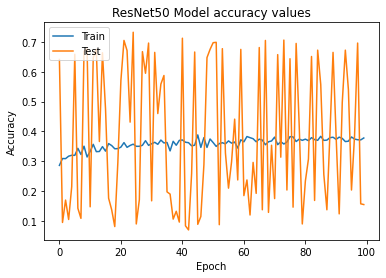

In [46]:
# Plot training & validation loss values
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('ResNet50 Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

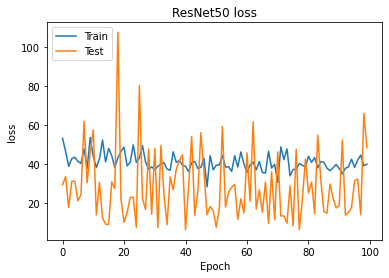

In [47]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('ResNet50 loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()